In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
from analysis.utils import *
from analysis.parse import *
from analysis.analy import *


<module 'modelAnaly' from '/Users/lucastian/tenen/TENENBAUM/drawgood/experiments/modelAnaly.py'>

In [5]:
# ==== LOAD DREAMCODER
ECTRAIN = "S8.2.2"
ECTRAIN = "S9.2"
DAT = loadCheckpoint(trainset=ECTRAIN, loadparse=True)

experimentOutputs/draw/2019-10-17T20:01:17.912264/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=2_MF=5_noConsolidation=False_pc=30_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1.5_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter.pickle
0
----
experimentOutputs/draw/2019-10-17T20:01:17.912264/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=6_MF=5_noConsolidation=False_pc=30_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1.5_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter_graph=True.pickle
6
----
experimentOutputs/draw/2019-10-17T20:01:17.912264/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=1_MF=5_noConsolidation=False_pc=30_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1.5_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter_graph=True.pickle
1
----
experimentOutputs/draw/2019-10-17T20:01:17.912264/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=3_MF=5_noCo

loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_5.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_38.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_45.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_34.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_49.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_9.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_shaping_16.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_shaping_20.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_10.pickle
loading parse experimentOutputs/draw/2019-10-17T20:01:17.912264/parsesflat_S9_nojitter_shaping_32.pickle
loading 

shaping_0 empty? False
shaping_1 empty? False
shaping_2 empty? False
shaping_3 empty? False
shaping_4 empty? False
shaping_5 empty? False
shaping_6 empty? False
shaping_7 empty? False
shaping_8 empty? False
S9_nojitter_shaping_0 empty? False
S9_nojitter_shaping_1 empty? False
S9_nojitter_shaping_2 empty? False
S9_nojitter_shaping_3 empty? False
S9_nojitter_shaping_4 empty? False
S9_nojitter_shaping_5 empty? False
S9_nojitter_shaping_6 empty? False
S9_nojitter_shaping_7 empty? False
S9_nojitter_shaping_8 empty? False
S9_nojitter_shaping_9 empty? False
S9_nojitter_shaping_10 empty? False
S9_nojitter_shaping_11 empty? False
S9_nojitter_shaping_12 empty? False
S9_nojitter_shaping_13 empty? False
S9_nojitter_shaping_14 empty? False
S9_nojitter_shaping_15 empty? False
S9_nojitter_shaping_16 empty? False
S9_nojitter_shaping_17 empty? False
S9_nojitter_shaping_18 empty? False
S9_nojitter_shaping_19 empty? False
S9_nojitter_shaping_20 empty? False
S9_nojitter_shaping_21 empty? False
S9_nojitter

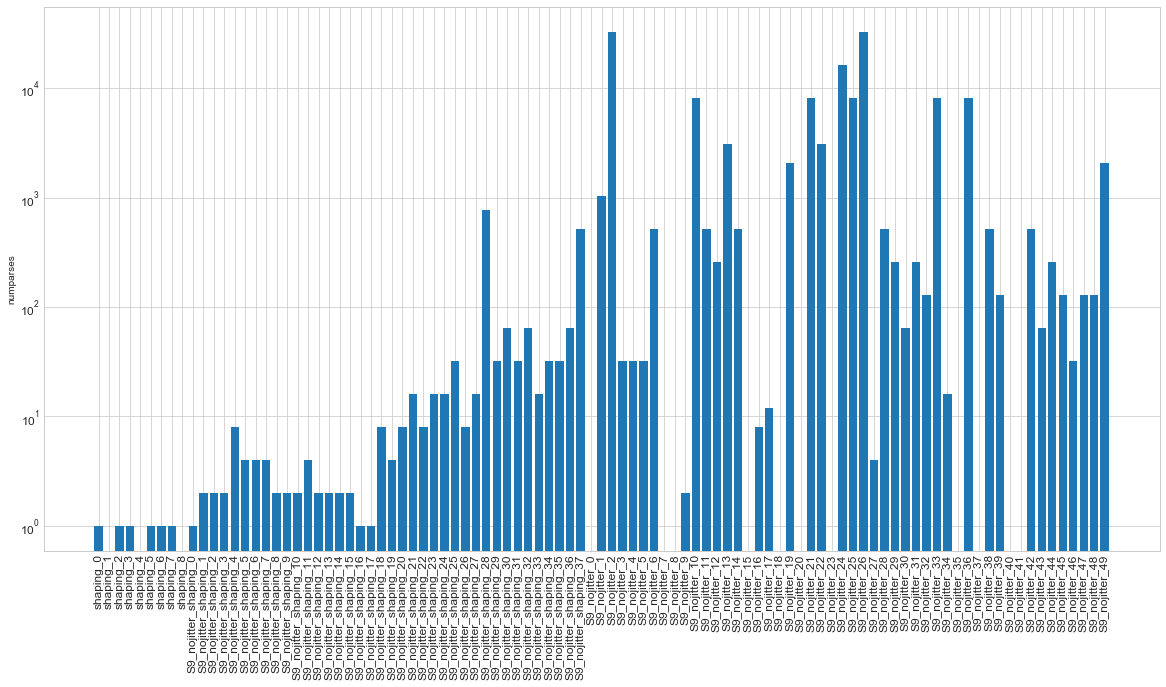

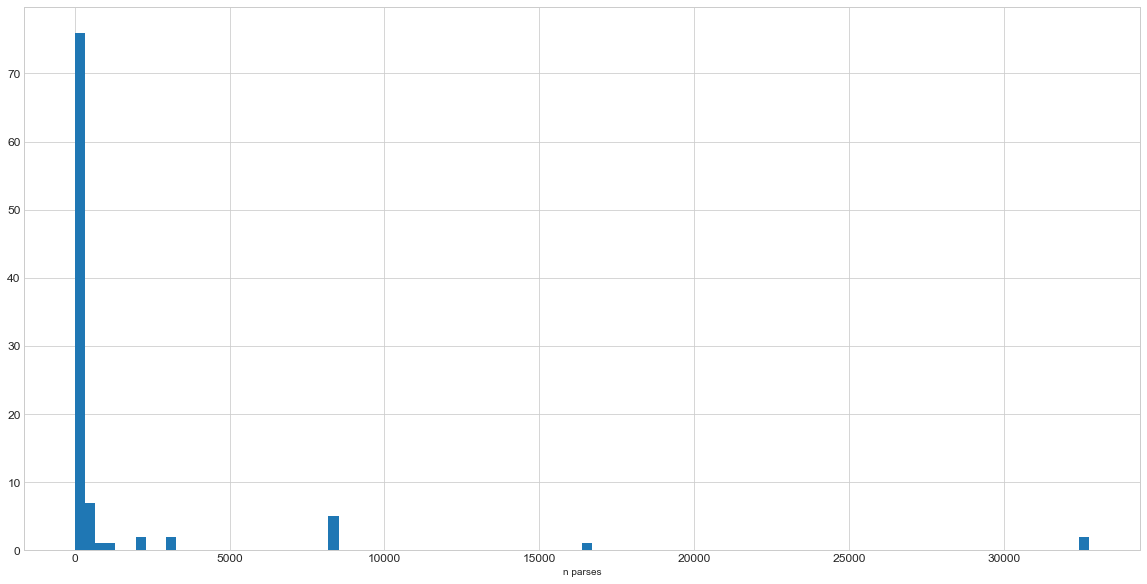

In [45]:
# === SOME SUMMARIES OF PARSES
programnames = DAT["programnames"]
parses = DAT["parses"]
result = DAT["result"]

# 1) COUNT NUMBER OF PARSES, AND MAKE SURE GOT PARSES FOR ALL CASES WHERE THERE ARE SOLUTIONS.
Numparses = []
for name in programnames:
    
    numparse = [len(p["parse"]) for p in parses if p["name"]==name]
    if not numparse:
        numparse=0
    else:
        assert len(numparse)==1
        numparse = numparse[0]
    Numparses.append(numparse)
    
    
plt.figure(figsize=(20,10))
plt.bar(range(len(Numparses)), Numparses, log=True)
plt.ylabel("numparses")
plt.xticks(ticks = range(len(programnames)), labels=programnames, rotation=90)

plt.figure(figsize=(20,10))
plt.hist(Numparses, bins=100)
plt.xlabel('n parses')

for t, name in zip(tasks, programnames):
    
    empty = result.allFrontiers[t].empty
    
    print("{} empty? {}".format(name, empty))
    
    

In [53]:
# [NOT PREEXTRACTING PARSE] ===== FOR EACH TASK, PLOT DREAMCODER AND HUMANS
stimname = "S9_nojitter_30"
stimname = "S9_nojitter_1"

# === dreamcoder
# get all parses
t = getTask(stimname, DAT)[0]

if result.frontiersOverTime[t][-1].empty:
    print("EC NO SOLUTION!!")
else:
    p = result.frontiersOverTime[t][-1].bestPosterior.program
    print(p)
    parses = getParses(p)
    
    print("FOUND this many parses:")
    print(len(parses))

(connect (#(#(lambda (lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) None (connect $0 (reflect $1 angle6)) $2)))) rep3 #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line)) (#(lambda (reflect (connect line $0) angle6)) #(#(lambda (lambda (repeat $1 rep1 (transmat None (Some angle4) None $0 None)))) line (Some dist11)))) (repeat #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist4 #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line)) rep1 (transmat None None None (Some dist9) None)))
getting parse...
(connect (CHUNK_INVENTION ((lambda (CHUNK_INVENTION ((

In [46]:
# === try saving parse with json
parses_flat = [p.flatten() for p in parses]

import timeit
t1 = timeit.time.time()
with open("/tmp/tmp.pickle", "wb") as f:
    pickle.dump(parses_flat, f)
t2 = timeit.time.time()
print(t2-t1)

import timeit
t1 = timeit.time.time()
with open("/tmp/tmp.pickle", "rb") as f:
    pickle.load(f)
t2 = timeit.time.time()
print(t2-t1)


import timeit
t1 = timeit.time.time()
with open("/tmp/tmp.pickle", "wb") as f:
    pickle.dump(parses, f)
t2 = timeit.time.time()
print(t2-t1)

import timeit
t1 = timeit.time.time()
with open("/tmp/tmp.pickle", "rb") as f:
    pickle.load(f)
t2 = timeit.time.time()
print(t2-t1)


0.0018310546875
0.0035200119018554688
0.004529237747192383
6.218296051025391


In [6]:
# === LOAD HUMAN DATA
DAT["datflat_hu"] = dgprep.getFlatData(DAT["datall_human"])


In [11]:
# == for each stimulus, make a datflat (dreamcoder). save in DAT the path to that datflat
    
parses2datflatAllSave(DAT)



analysis/saved/DAT_ecS9.2_dg2.3/datflat_ec
S9_nojitter_shaping_2
getting datflat for S9_nojitter_shaping_2
shaping_5
getting datflat for shaping_5
S9_nojitter_shaping_21
getting datflat for S9_nojitter_shaping_21
S9_nojitter_shaping_33
getting datflat for S9_nojitter_shaping_33
S9_nojitter_11
getting datflat for S9_nojitter_11
S9_nojitter_44
getting datflat for S9_nojitter_44
S9_nojitter_39
getting datflat for S9_nojitter_39
S9_nojitter_4
getting datflat for S9_nojitter_4
S9_nojitter_27
getting datflat for S9_nojitter_27
S9_nojitter_shaping_17
getting datflat for S9_nojitter_shaping_17
S9_nojitter_8
getting datflat for S9_nojitter_8
S9_nojitter_48
getting datflat for S9_nojitter_48
S9_nojitter_35
getting datflat for S9_nojitter_35
S9_nojitter_13
getting datflat for S9_nojitter_13
S9_nojitter_shaping_31
getting datflat for S9_nojitter_shaping_31
S9_nojitter_shaping_23
getting datflat for S9_nojitter_shaping_23
S9_nojitter_37
getting datflat for S9_nojitter_37
S9_nojitter_shaping_15
gett

In [44]:
# === do segmentation of all datfalts:
REMOVELL=True
# 1) human
DATFLAT["datseg_hu"] = dgseg.getSegmentation(DAT["datflat_hu"], unique_codes=True, dosplits=True, removeLongVertLine=REMOVELL)                                      

# == DO SEGMENTATION FOR BOTH HUMAN AND DREAMCODER.

SKIPPIG STROKE, is bad...
SKIPPIG STROKE, is bad...
SKIPPIG STROKE, is bad...
SKIPPIG STROKE, is bad...
SKIPPIG STROKE, is bad...
SKIPPIG STROKE, is bad...
SKIPPIG STROKE, is bad...
DOING SPLIT (will report each split)
[-1008.8233333333334, -153.02333333333334, -61.22333333333334, 33.376666666666665, 111.67666666666666]
-149.72222900390625
[-977.9416666666666, -122.14166666666668, -30.34166666666667, 64.25833333333334, 142.55833333333334]
47.638885498046875
[-1008.8233333333334, -153.02333333333334, -61.22333333333334, 33.376666666666665, 111.67666666666666]
-35.388885498046875
[-977.9416666666666, -122.14166666666668, -30.34166666666667, 64.25833333333334, 142.55833333333334]
134.74996948242188
[-1008.8233333333334, -153.02333333333334, -61.22333333333334, 33.376666666666665, 111.67666666666666]
-132.02777099609375
doing split (1-->3)
[-1007.8033333333333, -118.00333333333333, -49.903333333333336, 41.196666666666665, 116.09666666666668]
-62.611114501953125
[-980.4916666666667, -90.691

[-1007.0666666666667, -160.06666666666666, -78.06666666666666, -0.06666666666666732, 51.93333333333333]
-132.0
[-982.3333333333334, -135.33333333333334, -53.33333333333333, 24.666666666666668, 76.66666666666667]
35.0
doing split (1-->2)
[-1007.0666666666667, -160.06666666666666, -78.06666666666666, -0.06666666666666732, 51.93333333333333]
-35.0
[-982.3333333333334, -135.33333333333334, -53.33333333333333, 24.666666666666668, 76.66666666666667]
52.0
[-1008.5, -167.5, -74.5, 10.5, 87.5]
-20.0
doing split (1-->2)
[-1008.5, -167.5, -74.5, 10.5, 87.5]
-103.0
[-978.75, -137.75, -44.75, 40.25, 117.25]
41.0
doing split (1-->2)
[-1008.1833333333333, -149.68333333333334, -56.18333333333334, 24.816666666666666, 95.81666666666666]
-124.0
[-979.5416666666666, -121.04166666666667, -27.541666666666668, 53.45833333333333, 124.45833333333333]
7.0
[-1008.1833333333333, -149.68333333333334, -56.18333333333334, 24.816666666666666, 95.81666666666666]
5.0
doing split (1-->2)
[-1008.1833333333333, -149.68333

[-1008.7166666666667, -147.71666666666667, -61.71666666666667, 30.28333333333333, 113.78333333333333]
-112.0
[-978.2083333333334, -117.20833333333333, -31.208333333333332, 60.79166666666667, 144.29166666666666]
-11.0
[-1008.7166666666667, -147.71666666666667, -61.71666666666667, 30.28333333333333, 113.78333333333333]
-81.0
[-978.2083333333334, -117.20833333333333, -31.208333333333332, 60.79166666666667, 144.29166666666666]
-21.0
[-1008.7166666666667, -147.71666666666667, -61.71666666666667, 30.28333333333333, 113.78333333333333]
-31.0
[-978.2083333333334, -117.20833333333333, -31.208333333333332, 60.79166666666667, 144.29166666666666]
49.0
[-1007.85, -88.35, -7.8500000000000005, 70.15, 147.15]
-117.0
[-980.375, -60.875, 19.625, 97.625, 174.625]
24.0
doing split (1-->2)
[-1007.85, -88.35, -7.8500000000000005, 70.15, 147.15]
-51.0
[-980.375, -60.875, 19.625, 97.625, 174.625]
20.0
[-1007.85, -88.35, -7.8500000000000005, 70.15, 147.15]
-99.0
[-980.375, -60.875, 19.625, 97.625, 174.625]
-51

[-1008.6333333333333, -67.13333333333333, 17.866666666666667, 116.86666666666667, 191.86666666666667]
-16.5
[-978.4166666666666, -36.91666666666667, 48.08333333333333, 147.08333333333334, 222.08333333333334]
73.5
[-1008.0333333333333, -175.03333333333333, -100.03333333333333, -7.533333333333333, 65.96666666666667]
-18.0
[-979.9166666666666, -146.91666666666666, -71.91666666666667, 20.583333333333332, 94.08333333333333]
69.0
[-1008.0333333333333, -175.03333333333333, -100.03333333333333, -7.533333333333333, 65.96666666666667]
-118.0
[-979.9166666666666, -146.91666666666666, -71.91666666666667, 20.583333333333332, 94.08333333333333]
48.0
doing split (1-->2)
[-1008.0333333333333, -175.03333333333333, -100.03333333333333, -7.533333333333333, 65.96666666666667]
-150.0
[-979.9166666666666, -146.91666666666666, -71.91666666666667, 20.583333333333332, 94.08333333333333]
-49.0
[-1008.2, -176.2, -88.2, -4.700000000000001, 69.8]
-193.0
[-979.5, -147.5, -59.5, 24.0, 98.5]
-80.0
[-1008.2, -176.2, -

[-1008.8433333333334, -152.84333333333333, -72.74333333333334, 16.85666666666667, 112.45666666666668]
-85.78599548339844
[-977.8916666666667, -121.89166666666667, -41.79166666666667, 47.80833333333334, 143.40833333333336]
-18.783859252929688
[-1008.8433333333334, -152.84333333333333, -72.74333333333334, 16.85666666666667, 112.45666666666668]
-120.25529479980469
[-977.8916666666667, -121.89166666666667, -41.79166666666667, 47.80833333333334, 143.40833333333336]
64.09748840332031
doing split (1-->2)
[-1008.8433333333334, -152.84333333333333, -72.74333333333334, 16.85666666666667, 112.45666666666668]
-173.89576721191406
[-977.8916666666667, -121.89166666666667, -41.79166666666667, 47.80833333333334, 143.40833333333336]
-97.98582458496094
[-1009.2366666666667, -184.4366666666667, -96.63666666666667, -4.136666666666668, 92.66333333333334]
-87.72250366210938
doing split (1-->2)
[-1009.38, -196.38, -93.78, -0.7800000000000011, 85.02000000000001]
-115.99502563476562
[-976.55, -163.55, -60.95, 

doing split (1-->2)
[-1006.7066666666667, -115.80666666666667, -45.006666666666675, 19.793333333333333, 85.39333333333335]
-66.53141784667969
[-983.2333333333333, -92.33333333333334, -21.533333333333335, 43.266666666666666, 108.86666666666667]
-24.721145629882812
[-1006.7066666666667, -115.80666666666667, -45.006666666666675, 19.793333333333333, 85.39333333333335]
-5.6963653564453125
[-983.2333333333333, -92.33333333333334, -21.533333333333335, 43.266666666666666, 108.86666666666667]
46.62187194824219
[-1007.79, -77.99000000000001, 2.5100000000000016, 82.01000000000002, 155.71]
-30.417526245117188
[-980.525, -50.72500000000001, 29.775, 109.275, 182.975]
33.51460266113281
[-1007.79, -77.99000000000001, 2.5100000000000016, 82.01000000000002, 155.71]
-24.997665405273438
[-980.525, -50.72500000000001, 29.775, 109.275, 182.975]
43.24821472167969
[-1007.0833333333334, -69.28333333333333, -9.383333333333333, 58.51666666666667, 143.21666666666667]
-103.25372314453125
[-982.2916666666666, -44.4

[-1008.5933333333334, -231.99333333333334, -132.09333333333333, -54.093333333333334, 25.806666666666665]
-79.12149047851562
doing split (1-->2)
[-1008.5933333333334, -231.99333333333334, -132.09333333333333, -54.093333333333334, 25.806666666666665]
20.2091064453125
[-1009.0633333333333, -122.56333333333333, -35.36333333333333, 49.13666666666667, 149.33666666666667]
-48.3792724609375
[-977.3416666666667, -90.84166666666667, -3.6416666666666693, 80.85833333333333, 181.05833333333334]
104.35223388671875
doing split (1-->2)
[-1007.9533333333334, -153.55333333333334, -81.15333333333334, 9.146666666666668, 85.04666666666667]
-159.59030151367188
[-980.1166666666667, -125.71666666666667, -53.31666666666667, 36.983333333333334, 112.88333333333333]
-102.75997924804688
[-1007.9533333333334, -153.55333333333334, -81.15333333333334, 9.146666666666668, 85.04666666666667]
-180.53424072265625
[-980.1166666666667, -125.71666666666667, -53.31666666666667, 36.983333333333334, 112.88333333333333]
-143.300

[-984.8666666666667, -54.36666666666667, 1.7333333333333343, 59.333333333333336, 127.23333333333335]
6.73748779296875
doing split (1-->2)
[-1005.9633333333334, -66.56333333333333, -8.363333333333333, 48.63666666666667, 112.33666666666667]
-33.07501220703125
[-985.0916666666667, -45.69166666666667, 12.508333333333333, 69.50833333333334, 133.20833333333334]
17.149993896484375
[-1005.9633333333334, -66.56333333333333, -8.363333333333333, 48.63666666666667, 112.33666666666667]
-27.5625
[-985.0916666666667, -45.69166666666667, 12.508333333333333, 69.50833333333334, 133.20833333333334]
16.5374755859375
[-1005.9633333333334, -66.56333333333333, -8.363333333333333, 48.63666666666667, 112.33666666666667]
-24.5
[-985.0916666666667, -45.69166666666667, 12.508333333333333, 69.50833333333334, 133.20833333333334]
85.13748168945312
doing split (1-->2)
[-1006.1433333333333, -107.14333333333333, -35.443333333333335, 21.756666666666668, 77.15666666666668]
-55.125
[-984.6416666666667, -85.64166666666667,

[-978.9933333333333, -178.39333333333335, -87.19333333333333, 16.306666666666672, 136.70666666666668]
101.40280151367188
[-978.9933333333333, -178.39333333333335, -87.19333333333333, 16.306666666666672, 136.70666666666668]
-82.34722900390625
[-978.9933333333333, -178.39333333333335, -87.19333333333333, 16.306666666666672, 136.70666666666668]
-120.45831298828125
[-978.9933333333333, -178.39333333333335, -87.19333333333333, 16.306666666666672, 136.70666666666668]
-34.70832824707031
[-978.9933333333333, -178.39333333333335, -87.19333333333333, 16.306666666666672, 136.70666666666668]
-44.236114501953125
[-978.9933333333333, -178.39333333333335, -87.19333333333333, 16.306666666666672, 136.70666666666668]
-208.9305419921875
[-978.9933333333333, -178.39333333333335, -87.19333333333333, 16.306666666666672, 136.70666666666668]
-112.29165649414062
[-978.9933333333333, -178.39333333333335, -87.19333333333333, 16.306666666666672, 136.70666666666668]
-14.291656494140625
[-978.9933333333333, -178.39

[-982.2, -141.2, -50.2, 43.8, 125.8]
-109.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
65.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
-105.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
71.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
-36.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
-103.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
-12.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
-28.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
-168.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
-73.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
24.0
[-982.2, -141.2, -50.2, 43.8, 125.8]
103.0
[-984.4666666666667, -55.96666666666667, 12.533333333333335, 97.03333333333333, 177.03333333333333]
-103.5
[-984.4666666666667, -55.96666666666667, 12.533333333333335, 97.03333333333333, 177.03333333333333]
42.5
[-984.4666666666667, -55.96666666666667, 12.533333333333335, 97.03333333333333, 177.03333333333333]
-39.5
[-984.4666666666667, -55.96666666666667, 12.533333333333335, 97.03333333333333, 177.03333333333333]
-101.5
[-984.4666666666667, -55.96666666666667, 12.53333333333333

[-984.3666666666667, -76.86666666666666, -2.3666666666666654, 70.63333333333334, 157.63333333333333]
-95.5
[-984.3666666666667, -76.86666666666666, -2.3666666666666654, 70.63333333333334, 157.63333333333333]
-21.5
[-984.3666666666667, -76.86666666666666, -2.3666666666666654, 70.63333333333334, 157.63333333333333]
53.5
[-984.3666666666667, -76.86666666666666, -2.3666666666666654, 70.63333333333334, 157.63333333333333]
137.5
[-984.6333333333333, -128.13333333333333, -48.63333333333333, 17.366666666666667, 102.36666666666667]
-178.0
[-984.6333333333333, -128.13333333333333, -48.63333333333333, 17.366666666666667, 102.36666666666667]
45.0
[-984.6333333333333, -128.13333333333333, -48.63333333333333, 17.366666666666667, 102.36666666666667]
-174.0
[-984.6333333333333, -128.13333333333333, -48.63333333333333, 17.366666666666667, 102.36666666666667]
-169.0
[-984.6333333333333, -128.13333333333333, -48.63333333333333, 17.366666666666667, 102.36666666666667]
-32.0
[-984.6333333333333, -128.13333

[-984.4666666666667, -109.96666666666667, -42.46666666666667, 50.53333333333333, 123.03333333333333]
-59.5
[-984.4666666666667, -109.96666666666667, -42.46666666666667, 50.53333333333333, 123.03333333333333]
25.5
[-984.4666666666667, -109.96666666666667, -42.46666666666667, 50.53333333333333, 123.03333333333333]
106.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
-110.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
-50.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
-50.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
-71.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
7.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
-102.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
-43.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
26.5
[-987.2, -65.7, -12.2, 53.3, 126.3]
88.5
[-984.2666666666667, -67.26666666666667, 13.733333333333334, 100.23333333333333, 168.73333333333335]
-106.0
[-984.2666666666667, -67.26666666666667, 13.733333333333334, 100.23333333333333, 168.73333333333335]
113.0
[-984.2666666666667, -67.26666666666667, 13.733333333333334, 100.23333333333333, 168.7333

[-983.0333333333333, -81.03333333333333, 14.966666666666665, 110.96666666666667, 173.46666666666667]
-124.0
[-983.0333333333333, -81.03333333333333, 14.966666666666665, 110.96666666666667, 173.46666666666667]
-66.0
[-983.0333333333333, -81.03333333333333, 14.966666666666665, 110.96666666666667, 173.46666666666667]
66.0
[-983.0333333333333, -81.03333333333333, 14.966666666666665, 110.96666666666667, 173.46666666666667]
-22.0
[-983.0333333333333, -81.03333333333333, 14.966666666666665, 110.96666666666667, 173.46666666666667]
-103.0
[-983.0333333333333, -81.03333333333333, 14.966666666666665, 110.96666666666667, 173.46666666666667]
-7.0
[-983.0333333333333, -81.03333333333333, 14.966666666666665, 110.96666666666667, 173.46666666666667]
90.0
[-983.0333333333333, -81.03333333333333, 14.966666666666665, 110.96666666666667, 173.46666666666667]
139.0
[-985.0, -147.5, -66.0, 14.0, 77.5]
-31.0
[-985.0, -147.5, -66.0, 14.0, 77.5]
34.0
[-985.0, -147.5, -66.0, 14.0, 77.5]
-124.0
[-985.0, -147.5, -6

[-982.4, -187.60000000000002, -82.7, 13.800000000000004, 76.4]
-107.47454833984375
[-982.4, -187.60000000000002, -82.7, 13.800000000000004, 76.4]
-9.29510498046875
[-982.4, -187.60000000000002, -82.7, 13.800000000000004, 76.4]
55.38330078125
[-980.1066666666667, -81.50666666666666, 20.69333333333334, 124.09333333333333, 216.89333333333335]
-131.8741912841797
[-980.1066666666667, -81.50666666666666, 20.69333333333334, 124.09333333333333, 216.89333333333335]
64.67842102050781
[-980.1066666666667, -81.50666666666666, 20.69333333333334, 124.09333333333333, 216.89333333333335]
-107.08726501464844
[-980.1066666666667, -81.50666666666666, 20.69333333333334, 124.09333333333333, 216.89333333333335]
-36.40580749511719
[-980.1066666666667, -81.50666666666666, 20.69333333333334, 124.09333333333333, 216.89333333333335]
-53.44682312011719
[-980.1066666666667, -81.50666666666666, 20.69333333333334, 124.09333333333333, 216.89333333333335]
74.55445861816406
[-980.1066666666667, -81.50666666666666, 20.6

[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
-90.14653015136719
[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
-90.03590393066406
[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
57.95927429199219
[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
-30.417526245117188
[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
-24.997665405273438
[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
-75.32490539550781
[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
7.5214385986328125
[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
77.97953796386719
[-984.42, -54.620000000000005, 25.88, 105.38000000000001, 179.07999999999998]
154.63169860839844
[-985.8333333333334, -48.03333333333334, 11.866666666666665, 79.76666666666668, 164.46666666666667]
-32.35321044921875
[-985.83

[-985.68, -70.67999999999999, 11.320000000000002, 78.52000000000001, 144.12]
-41.39794921875
[-985.68, -70.67999999999999, 11.320000000000002, 78.52000000000001, 144.12]
-47.766845703125
[-985.68, -70.67999999999999, 11.320000000000002, 78.52000000000001, 144.12]
25.659423828125
[-985.68, -70.67999999999999, 11.320000000000002, 78.52000000000001, 144.12]
-39.6832275390625
[-985.68, -70.67999999999999, 11.320000000000002, 78.52000000000001, 144.12]
-90.8795166015625
[-985.68, -70.67999999999999, 11.320000000000002, 78.52000000000001, 144.12]
-27.802734375
[-985.68, -70.67999999999999, 11.320000000000002, 78.52000000000001, 144.12]
55.8504638671875
[-985.68, -70.67999999999999, 11.320000000000002, 78.52000000000001, 144.12]
120.6419677734375
[-984.4733333333334, -117.97333333333333, -23.373333333333335, 41.02666666666667, 114.92666666666668]
5.2666015625
[-984.4733333333334, -117.97333333333333, -23.373333333333335, 41.02666666666667, 114.92666666666668]
-68.95574951171875
[-984.47333333

[-988.6466666666666, -70.04666666666667, -13.146666666666665, 38.05333333333334, 100.25333333333334]
-107.18751525878906
[-988.6466666666666, -70.04666666666667, -13.146666666666665, 38.05333333333334, 100.25333333333334]
-102.28749084472656
[-988.6466666666666, -70.04666666666667, -13.146666666666665, 38.05333333333334, 100.25333333333334]
1.2249908447265625
[-988.6466666666666, -70.04666666666667, -13.146666666666665, 38.05333333333334, 100.25333333333334]
51.44999694824219
[-988.6466666666666, -70.04666666666667, -13.146666666666665, 38.05333333333334, 100.25333333333334]
69.82499694824219
[-988.6466666666666, -70.04666666666667, -13.146666666666665, 38.05333333333334, 100.25333333333334]
-49.61250305175781
[-988.6466666666666, -70.04666666666667, -13.146666666666665, 38.05333333333334, 100.25333333333334]
4.2874908447265625
[-988.6466666666666, -70.04666666666667, -13.146666666666665, 38.05333333333334, 100.25333333333334]
-49.61250305175781
[-988.6466666666666, -70.04666666666667,

-55.125030517578125
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
0.0
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
-9.52777099609375
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
-2.72222900390625
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
-23.138916015625
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
130.66665649414062
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
9.52777099609375
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
-78.9444580078125
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
-102.08331298828125
[-1000, -162.38055725097655, -55.39722290039062, 51.58611145019532, 158.56944580078124]
-78.9444580078125
[-1000, -162.38055725097655, -55.397222

[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
-34.5
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
-48.5
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
-57.5
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
-54.5
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
80.0
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
79.5
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
-10.5
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
-30.5
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
-30.5
[-1000, -142.97916666666666, -49.60416666666666, 43.77083333333334, 137.14583333333334]
-105.5
[-1000, -110.00833333333335, -15.058333333333351, 79.89166666

45.5
[-1000, -78.0125, -1.1375000000000028, 75.7375, 152.6125]
-2.0
[-1000, -78.0125, -1.1375000000000028, 75.7375, 152.6125]
40.0
[-1000, -78.0125, -1.1375000000000028, 75.7375, 152.6125]
129.0
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
-79.0
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
-41.5
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
-86.0
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
-107.0
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
39.0
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
52.0
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
-24.5
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
-24.5
[-1000, -126.75, -47.85000000000001, 31.049999999999983, 109.94999999999999]
-84.0
[-1000, -105.44583333333333, -27.370833333333323, 50.704166

[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
-36.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
10.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
17.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
37.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
31.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
31.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
53.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
-14.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
-22.0
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
1.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
-16.5
[-1000, -134.975, -47.075, 40.82499999999999, 128.725]
-90.0
[-1000, -121.80357142857143, -41.55357142857143, 38.69642857142857, 118.94642857142857]
32.0
[-1000, -121.80357142857143, -41.55357142857143, 38.69642857142857, 118.94642857142857]
23.0
[-1000, -121.80357142857143, -41.55357142857143, 38.69642857142857, 118.94642857142857]
48

[-1000, -167.1994499206543, -74.73719863891601, 17.725052642822277, 110.18730392456055]
-17.256256103515625
[-1000, -167.1994499206543, -74.73719863891601, 17.725052642822277, 110.18730392456055]
-83.29478454589844
[-1000, -167.1994499206543, -74.73719863891601, 17.725052642822277, 110.18730392456055]
-6.415802001953125
[-1000, -167.1994499206543, -74.73719863891601, 17.725052642822277, 110.18730392456055]
-37.609893798828125
[-1000, -167.1994499206543, -74.73719863891601, 17.725052642822277, 110.18730392456055]
-37.609893798828125
[-1000, -167.1994499206543, -74.73719863891601, 17.725052642822277, 110.18730392456055]
-126.60150146484375
[-1000, -167.1994499206543, -74.73719863891601, 17.725052642822277, 110.18730392456055]
17.14569091796875
[-1000, -167.1994499206543, -74.73719863891601, 17.725052642822277, 110.18730392456055]
42.145233154296875
[-1000, -154.95551897684732, -51.63340365091959, 51.688711675008136, 155.01082700093588]
19.358047485351562
[-1000, -154.95551897684732, -51.

[-1000, -95.09282722473145, -22.552508163452146, 49.98781089782716, 122.52812995910645]
1.850799560546875
[-1000, -95.09282722473145, -22.552508163452146, 49.98781089782716, 122.52812995910645]
16.54827880859375
[-1000, -95.09282722473145, -22.552508163452146, 49.98781089782716, 122.52812995910645]
-61.1851806640625
[-1000, -95.09282722473145, -22.552508163452146, 49.98781089782716, 122.52812995910645]
13.7176513671875
[-1000, -105.68953844706218, -38.37499453226725, 28.939549382527673, 96.25409329732261]
-17.52813720703125
[-1000, -105.68953844706218, -38.37499453226725, 28.939549382527673, 96.25409329732261]
-40.826416015625
[-1000, -105.68953844706218, -38.37499453226725, 28.939549382527673, 96.25409329732261]
-64.2335205078125
[-1000, -105.68953844706218, -38.37499453226725, 28.939549382527673, 96.25409329732261]
12.0845947265625
[-1000, -105.68953844706218, -38.37499453226725, 28.939549382527673, 96.25409329732261]
55.415008544921875
[-1000, -105.68953844706218, -38.37499453226725

-38.28123474121094
[-1000, -97.04040234883625, -31.257906468709308, 34.52458941141764, 100.3070852915446]
7.350006103515625
[-1000, -97.04040234883625, -31.257906468709308, 34.52458941141764, 100.3070852915446]
-0.9187469482421875
[-1000, -97.04040234883625, -31.257906468709308, 34.52458941141764, 100.3070852915446]
62.475006103515625
[-1000, -97.04040234883625, -31.257906468709308, 34.52458941141764, 100.3070852915446]
62.475006103515625
[-1000, -97.04040234883625, -31.257906468709308, 34.52458941141764, 100.3070852915446]
-67.98748779296875
[-1000, -97.04040234883625, -31.257906468709308, 34.52458941141764, 100.3070852915446]
-58.79998779296875
[-1000, -97.04040234883625, -31.257906468709308, 34.52458941141764, 100.3070852915446]
12.556259155273438
[-1000, -83.8053005218506, -21.60593147277833, 40.59343757629394, 102.79280662536621]
-9.79998779296875
[-1000, -83.8053005218506, -21.60593147277833, 40.59343757629394, 102.79280662536621]
8.268753051757812
[-1000, -83.8053005218506, -21.

NameError: name 'DATFLAT' is not defined

In [ ]:
# 2) model
# -- for each stim, load datflat, do segmentation, save...
stims = DATgetSolvedStim(DAT)
for s in stims:
    print("getting datsegs for {}".format(s))
    # load datflat
    datflat = DATloadDatFlat(DAT, s)
    
    # 1) get datseg
    datseg = dgseg.getSegmentation(datflat, unique_codes=True, dosplits=True, removebadstrokes=True, removeLongVertLine=REMOVELL) 
        
    # save datflat
    DATsaveDatSeg(DAT, datseg, s)
    
    
    

In [61]:
# ==== GET ALL STRING DISTANCES, BETWEEN ALL STIM X SUBJECTS

def seqgetter_ec(stim):
    datseg = DATloadDatSeg(DAT, stim)
    return [[d["codes_unique"] for d in dat] for dat in datseg]

def seqgetter_hu(stim, human):
    
    datflat = DAT["dat"]
    datseg = [d for d in DATFLAT["datseg_hu"]
    


DATloadDatSeg(DAT, DATgetSolvedStim(DAT)[10])

REMOVING SHAPING STIMULI (THOSE HUMANS DID NOT GET)
removing, since I think is shaping: shaping_5
removing, since I think is shaping: shaping_7
removing, since I think is shaping: shaping_3
removing, since I think is shaping: shaping_6
removing, since I think is shaping: shaping_2
removing, since I think is shaping: shaping_0


FileNotFoundError: [Errno 2] No such file or directory: 'analysis/saved/DAT_ecS9.2_dg2.3/datsegs_ec/S9_nojitter_48'

In [ ]:
s = DATgetSolvedStim(DAT)[0]

datflat = DATloadDatFlat(DAT, s)

In [65]:
    
#     1) get datseg
datseg = dgseg.getSegmentation(datflat, unique_codes=True, dosplits=True, removebadstrokes=True, removeLongVertLine=REMOVELL) 

DOING SPLIT (will report each split)
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25

-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.7

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25

0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, 

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25

[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.999999999999

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25

[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0

0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.2

-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.12323399573

0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e

[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
1.0000000000000002
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-6.123233995736766e-17
[-999.75, -1.25, -0.25, 0.75, 1.75]
0.9999999999999999
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
-6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
-1.0
[-999.75, -1.25, -0.25, 0.75, 1.75]
6.123233995736766e-17
[-1000.1, -1.6, -0.6, 0.4, 1.4]
6.123233995736766e-17
[-999.75, -1.25

[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.99999

[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.99706

[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5

[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0

[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.99999

[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0

[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.99706

[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-9

[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-9

[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.12

[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.1232

[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.49

[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17


[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-

-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]

[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.99706

[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.00000

0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3,

1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.

[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0


-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.

[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970

[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-9

[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000001
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.49999999999999994
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.5
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.4999999999999996
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.4999999999999995
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.5000000000000006
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.5000000000000004
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771796
[-999.8, -1.3, -0.3, 0.7, 1.7]
1.0000000000000002
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.9970689785771798
[-999.8, -1.3, -0.3, 0.7, 1.7]
-0.9970689785771799
[-999.8, -1.3, -0.3, 0.7, 1.7]
0.9999999999999999
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17
[-999.8, -1.3, -0.3, 0.7, 1.7]
-1.0
[-999.8, -1.3, -0.3, 0.7, 1.7]
-6.123233995736766e-17

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.599999

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.79999

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.599999

0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.60000000

0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.59999

-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.599

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, 

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8,

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.60000000000

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999

1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.600000000

0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.60000

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.60000000

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.60000000

6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.600000000

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.799999

0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.59

6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000

6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.1102230246251565e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.9999999999999999
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
1.0000000000000004
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000

[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-2.449293598294706e-16
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
6.123233995736766e-17
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
0.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-0.9999999999999998
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1.0
[-1000, -1.8, -0.6000000000000001, 0.5999999999999999, 1.7999999999999996]
-1

In [50]:
dgmodel.distModelHumanAllStims(stimlist = DATgetSolvedStim(DAT))

NameError: name 'dgmodel' is not defined

In [76]:
# === OLD - ONE LARGE OBJECT ACROSS ALL STIM X PARSE - PROBLEM, TOO LARGE TO KEEP IN MEMORY.

# == convert all parses to one datflat list of dicts
# -- names of all stims:
from analysis.parse import *

DAT["datflat_ec"] = parses2datflatAll(DAT)

# check memory usage
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)



# === SAVE DAT

def saveDAT(DAT):
    savename = "analysis/saved/DAT_ec{}_dg{}".format(DAT["trainset"], DAT["behaviorexpt"])
    with open(savename, "wb") as f:
        pickle.dump(DAT, f)
    print("saved DAT to {}".format(savename))    


print(DAT.keys())
print(DAT["savedir"])
print(DAT["trainset"])
print(DAT["behaviorexpt"])
saveDAT(DAT)

getting datflat for S9_nojitter_shaping_2
getting datflat for shaping_5
getting datflat for S9_nojitter_shaping_21
getting datflat for S9_nojitter_shaping_33
getting datflat for S9_nojitter_11
getting datflat for S9_nojitter_44
getting datflat for S9_nojitter_39
getting datflat for S9_nojitter_4
getting datflat for S9_nojitter_27
getting datflat for S9_nojitter_shaping_17
getting datflat for S9_nojitter_8
getting datflat for S9_nojitter_48
getting datflat for S9_nojitter_35
getting datflat for S9_nojitter_13
getting datflat for S9_nojitter_shaping_31
getting datflat for S9_nojitter_shaping_23
getting datflat for S9_nojitter_37
getting datflat for S9_nojitter_shaping_15
getting datflat for S9_nojitter_29
getting datflat for S9_nojitter_shaping_19
getting datflat for S9_nojitter_6
getting datflat for S9_nojitter_25
getting datflat for S9_nojitter_46
getting datflat for S9_nojitter_shaping_0
getting datflat for shaping_7
getting datflat for S9_nojitter_2
getting datflat for S9_nojitter_21

In [ ]:
# === LOAD HUMAN DATA
# get all subjects for this stimulus
# datflat_hu = dgprep.getFlatData(datall_drawgood)
datflat_hu = dgutils.filterDat(dgprep.getFlatData(datall_drawgood), stimlist=["{}.png".format(stimname)])
workers = dgutils.getWorkers(datall_drawgood)

In [57]:
# [USING NOT PRE-PARSED STUFF] plot a few example parses
ECTRAIN = "S9.2"
datflat_ec = parses2datflat([p.flatten() for p in parses], stimname=stimname, condition=ECTRAIN)

prog 0
prog 1
prog 2
prog 3
prog 4
prog 5
prog 6
prog 7
prog 8
prog 9
prog 10
prog 11
prog 12
prog 13
prog 14
prog 15
prog 16
prog 17
prog 18
prog 19
prog 20
prog 21
prog 22
prog 23
prog 24
prog 25
prog 26
prog 27
prog 28
prog 29
prog 30
prog 31
prog 32
prog 33
prog 34
prog 35
prog 36
prog 37
prog 38
prog 39
prog 40
prog 41
prog 42
prog 43
prog 44
prog 45
prog 46
prog 47
prog 48
prog 49
prog 50
prog 51
prog 52
prog 53
prog 54
prog 55
prog 56
prog 57
prog 58
prog 59
prog 60
prog 61
prog 62
prog 63
prog 64
prog 65
prog 66
prog 67
prog 68
prog 69
prog 70
prog 71
prog 72
prog 73
prog 74
prog 75
prog 76
prog 77
prog 78
prog 79
prog 80
prog 81
prog 82
prog 83
prog 84
prog 85
prog 86
prog 87
prog 88
prog 89
prog 90
prog 91
prog 92
prog 93
prog 94
prog 95
prog 96
prog 97
prog 98
prog 99
prog 100
prog 101
prog 102
prog 103
prog 104
prog 105
prog 106
prog 107
prog 108
prog 109
prog 110
prog 111
prog 112
prog 113
prog 114
prog 115
prog 116
prog 117
prog 118
prog 119
prog 120
prog 121
prog 122
pro

DOING SPLIT (will report each split)
GETTING UNIQUE CODES
FAILED TO LOAD STIM .png file...


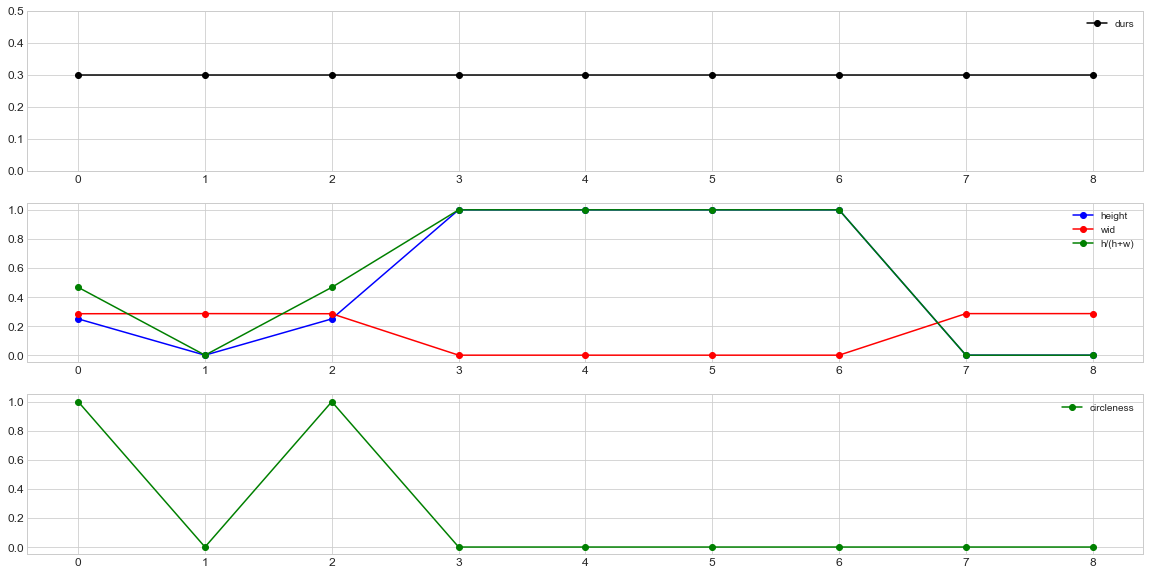

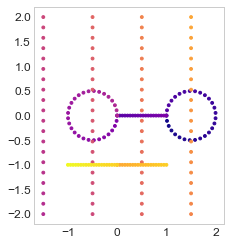

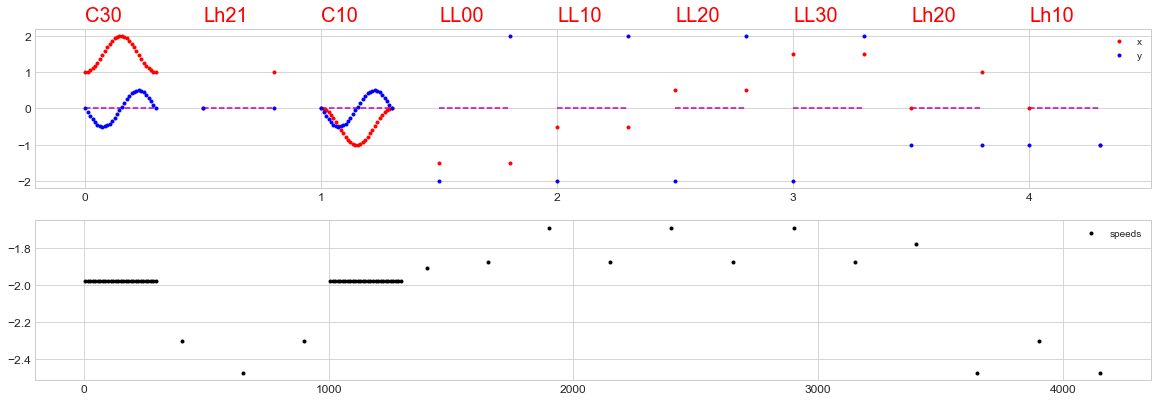

In [136]:
# dgseg.plotDrawing(datflat_ec[0], addstrokelines=True)
dgseg.plotDrawingAndTimecourse(datflat_ec[0], plotUniqueCodes=True, dosplits=True)

DOING SPLIT (will report each split)
doing split (1-->2)
GETTING UNIQUE CODES
FAILED TO LOAD STIM .png file...


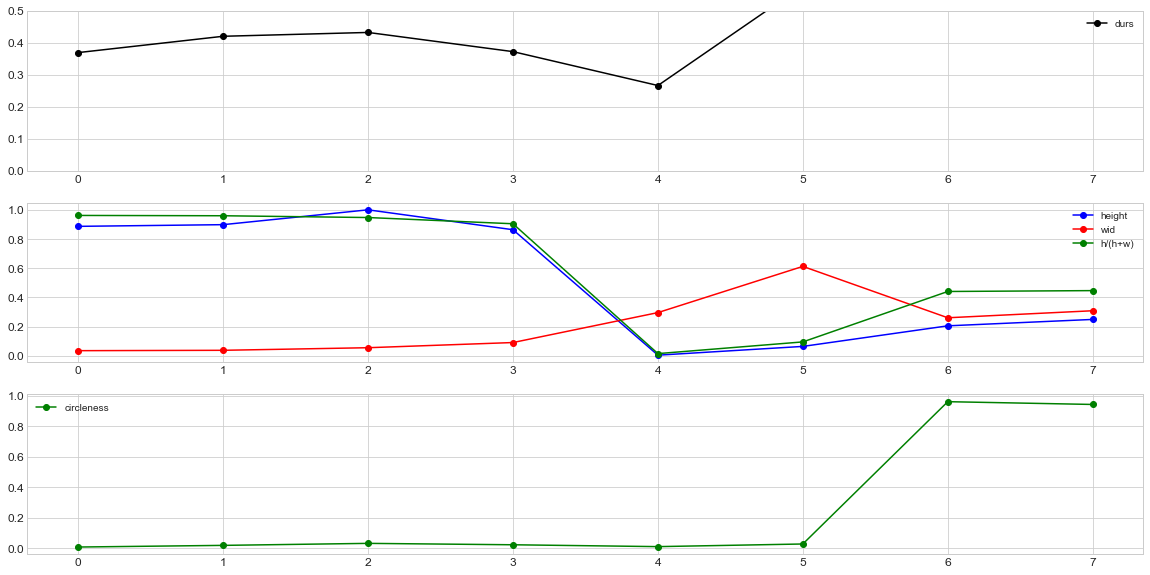

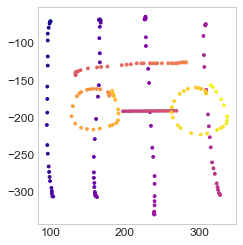

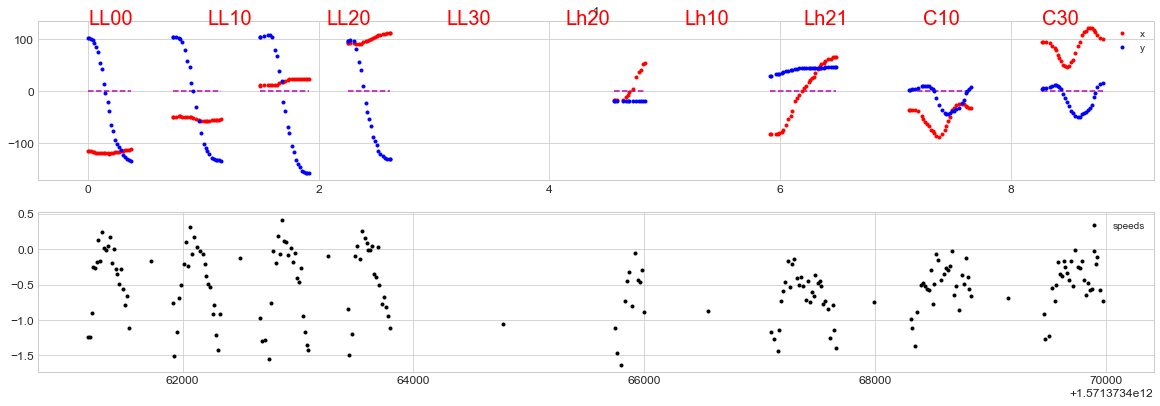

In [137]:
# --- print a random subject
SUBJ=7
datflat_single = dgutils.filterDat(datflat_hu, workernumlist=[SUBJ], stimlist=["{}.png".format(stimname)])
dgseg.plotDrawingAndTimecourse(datflat_single, plotUniqueCodes=True, dosplits=True)

In [138]:
# === dreamcoder + human
datflat_hu = dgutils.filterDat(dgprep.getFlatData(datall_drawgood), stimlist=["{}.png".format(stimname)])
print(len(datflat_hu))
sorted(dgutils.getStimList(dgutils.filterDat(dgprep.getFlatData(datall_drawgood), condlist=[1])))

# segment parses
# -- for dreamcoder, get a random subset
N = min(20, len(datflat_ec))
idx_rand = np.random.permutation(range(len(datflat_ec)))[:N]
datflat_ec_rand = [datflat_ec[i] for i in idx_rand]
scores_ec = dgseg.getSegmentation(datflat_ec_rand, unique_codes=True, dosplits=True)
scores_hu = dgseg.getSegmentation(datflat_hu, unique_codes=True, dosplits=True)


# compare parses as strings
distances = []
for i, s_hu in enumerate(scores_hu):
    for ii, s_ec in enumerate(scores_ec):
        # --- get all distances
        code_ec = [s["codes_unique"] for s in s_ec]
        code_hu = [s["codes_unique"] for s in s_hu]
        d = stringDist(code_hu, code_ec)
        distances.append({
            "hum":i,
            "ec":ii,
            "code_hu":code_hu,
            "code_ec":code_ec,
            "dist":d
        })
for d in distances:
    print(d)
    
    
# --- plot string distances for this pair
plt.figure()
plt.hist([d["dist"] for d in distances])
plt.xlim((0,1))
plt.title("string distances")    

DOING SPLIT (will report each split)
GETTING UNIQUE CODES
DOING SPLIT (will report each split)
doing split (1-->2)
doing split (1-->2)
doing split (1-->2)
doing split (1-->2)
doing split (1-->2)
GETTING UNIQUE CODES


/Users/lucastian/tenen/TENENBAUM/drawgood/experiments/utils.py:291: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(2*nsteps, 2))


=== HUMAN 0
- ec 0
['LL30', 'LL20', 'LL10', 'LL00', 'Lh20', 'Lh10', 'Lh21', 'C30', 'C10'] [ec]
['LL00', 'LL10', 'LL20', 'LL30', 'Lh10', 'Lh20', 'Lh30', 'C10', 'C30'] [hu]
dist = 0.6666666865348816
- ec 1
['LL30', 'LL20', 'LL10', 'LL00', 'Lh10', 'Lh20', 'C30', 'Lh21', 'C10'] [ec]
['LL00', 'LL10', 'LL20', 'LL30', 'Lh10', 'Lh20', 'Lh30', 'C10', 'C30'] [hu]
dist = 0.6666666865348816
- ec 2
['Lh21', 'C30', 'C10', 'Lh20', 'Lh10', 'LL00', 'LL10', 'LL20', 'LL30'] [ec]
['LL00', 'LL10', 'LL20', 'LL30', 'Lh10', 'Lh20', 'Lh30', 'C10', 'C30'] [hu]
dist = 0.8888888955116272
- ec 3
['Lh10', 'Lh20', 'LL30', 'LL20', 'LL10', 'LL00', 'C30', 'Lh21', 'C10'] [ec]
['LL00', 'LL10', 'LL20', 'LL30', 'Lh10', 'Lh20', 'Lh30', 'C10', 'C30'] [hu]
dist = 0.8888888955116272
- ec 4
['C10', 'Lh21', 'C30', 'Lh10', 'Lh20', 'LL00', 'LL10', 'LL20', 'LL30'] [ec]
['LL00', 'LL10', 'LL20', 'LL30', 'Lh10', 'Lh20', 'Lh30', 'C10', 'C30'] [hu]
dist = 0.8888888955116272
- ec 5
['C30', 'Lh21', 'C10', 'Lh10', 'Lh20', 'LL30', 'LL20', '

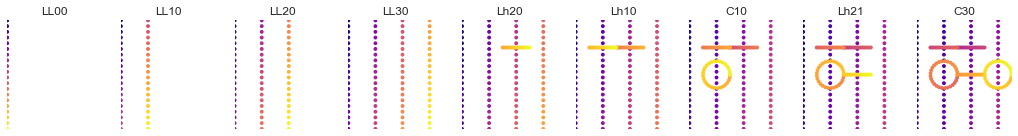

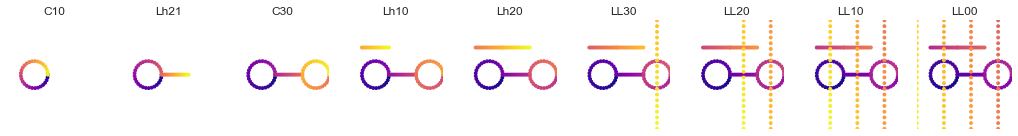

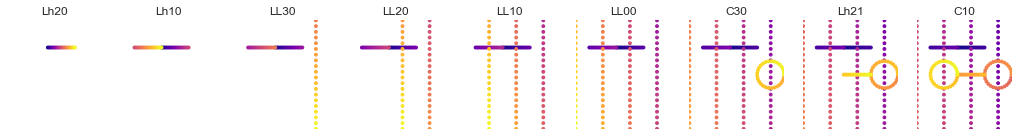

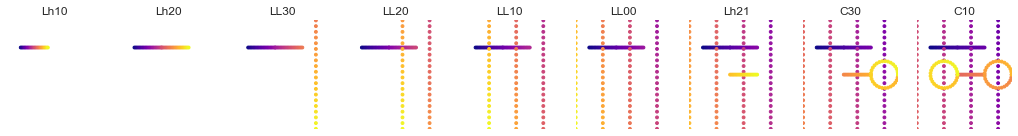

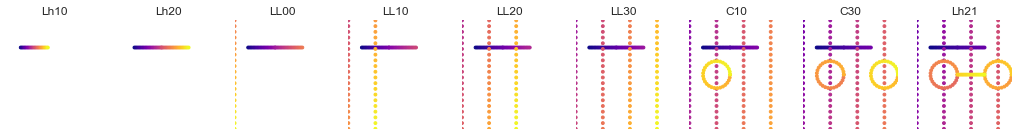

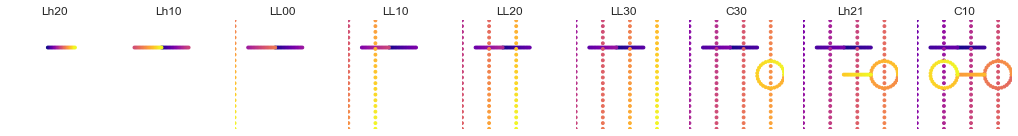

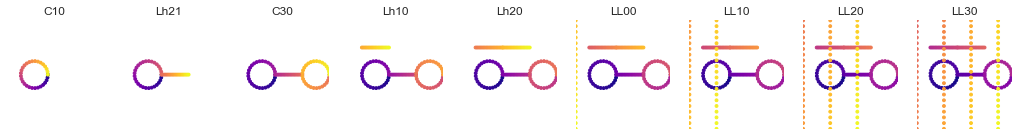

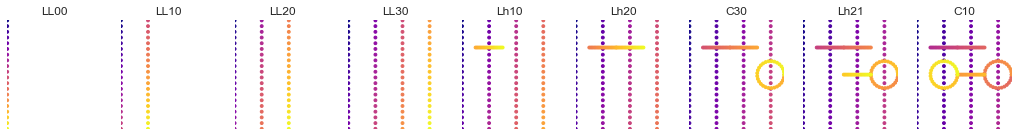

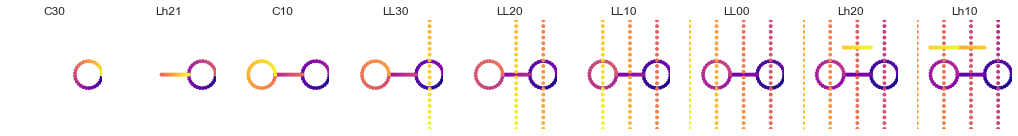

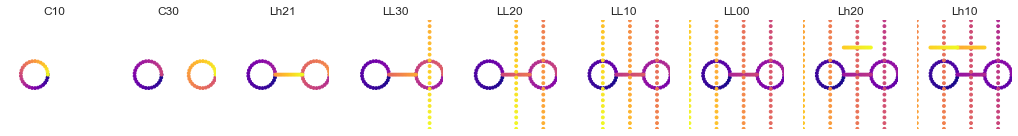

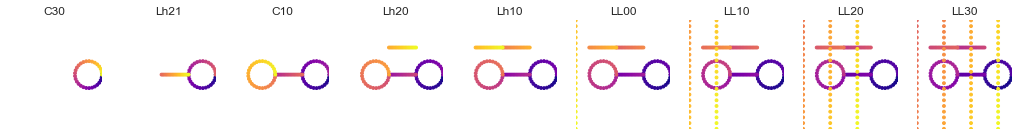

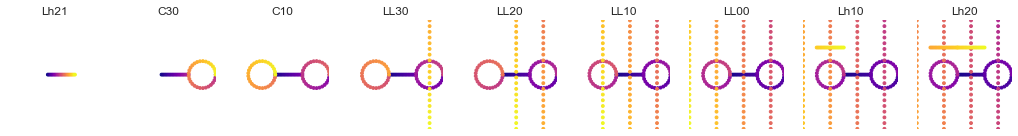

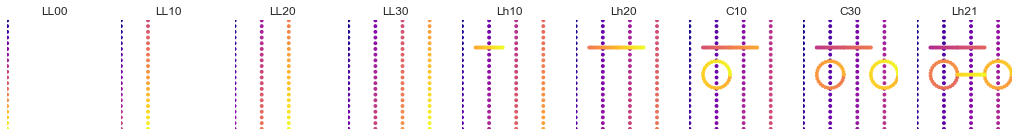

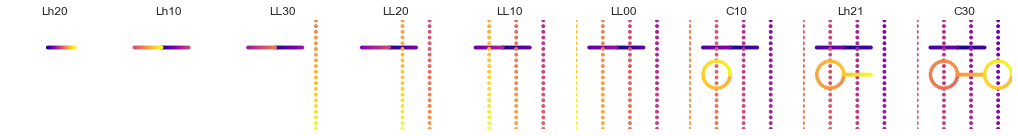

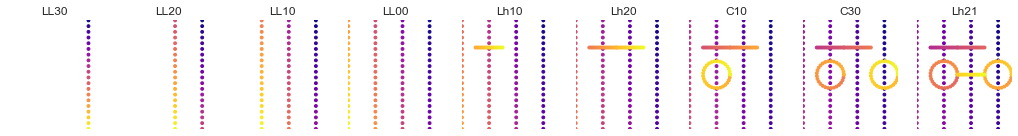

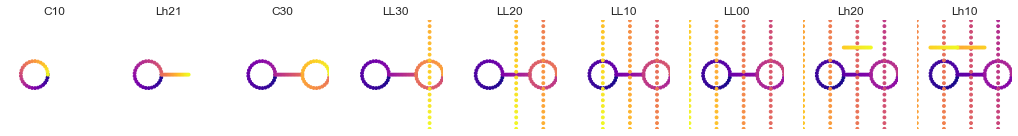

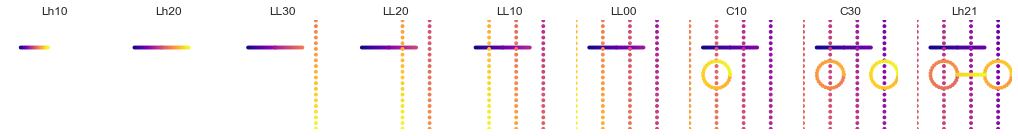

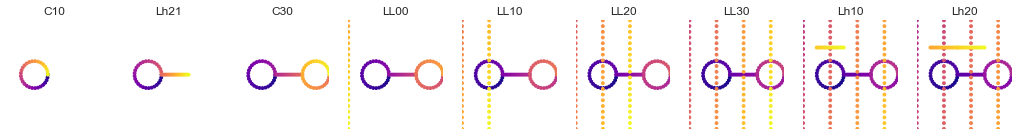

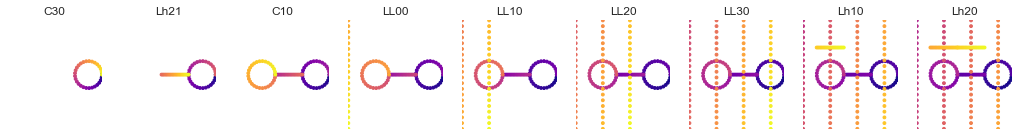

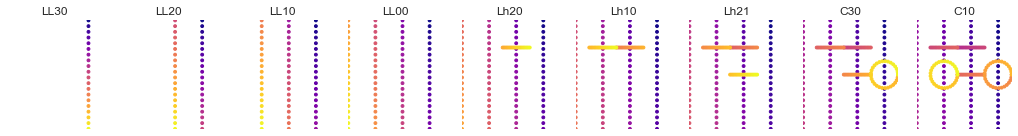

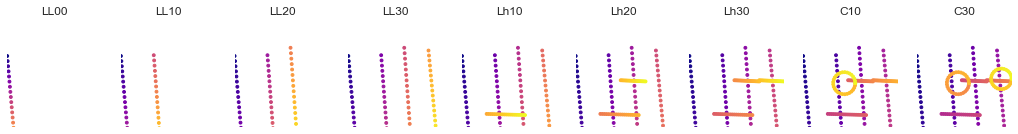

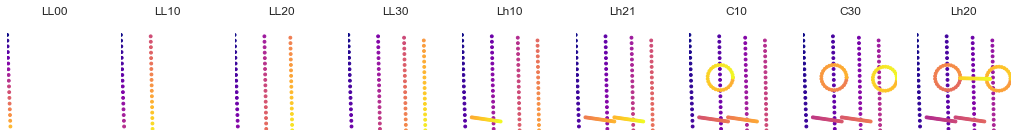

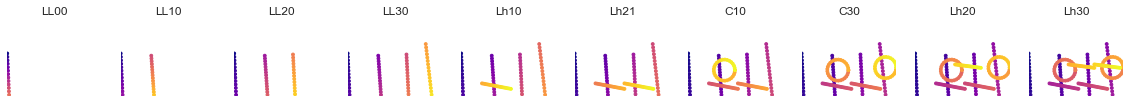

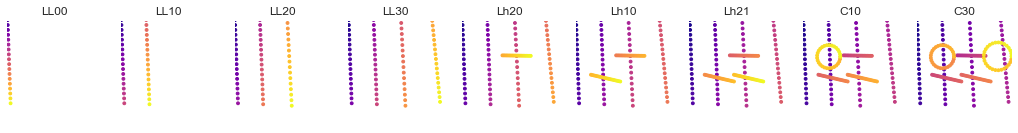

In [140]:
# ==== convert from sequence of codes to 

strokes_ec = dgseg.segmentedScores2NumpyStrokes(scores_ec)
strokes_hu = dgseg.segmentedScores2NumpyStrokes(scores_hu)

for stroke, score in zip(strokes_ec, scores_ec):
    dgutils.plotDrawingSteps(stroke, score)
    
for stroke, score in zip(strokes_hu, scores_hu):
    dgutils.plotDrawingSteps(stroke, score)

# === print codes 
nhuman = len(scores_hu)
for hu in range(nhuman):
    print("=== HUMAN {}".format(hu))

    # find all scores for this human
    for d in distances:
        if d["hum"]==hu:
            print("- ec {}".format(d["ec"]))
            print("{} [ec]".format(d["code_ec"]))
            print("{} [hu]".format(d["code_hu"]))  
            print("dist = {}".format(d["dist"]))

            

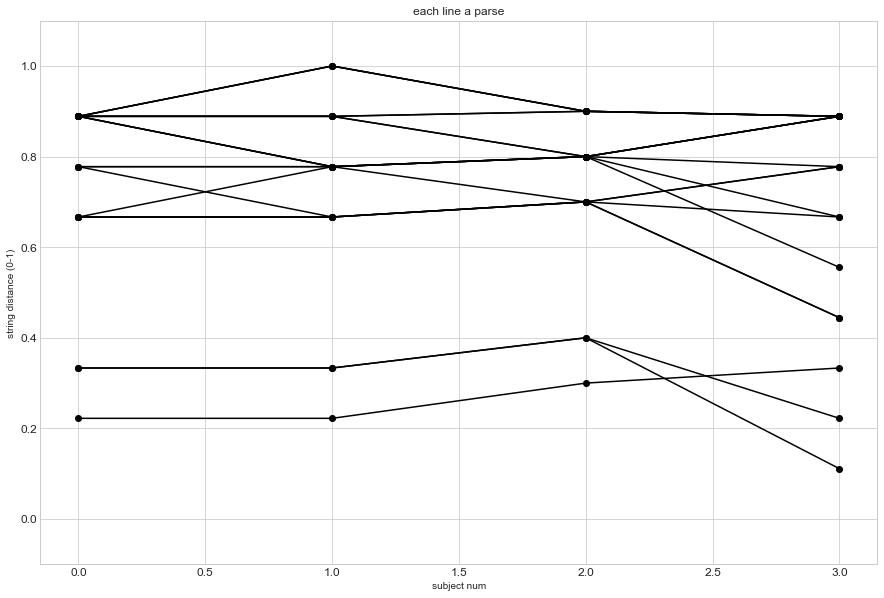

In [141]:
# ==== plot histogram, where x axis are subjects, and y axis are scores, and each line is a different parse


nhuman = len(scores_hu)
nparses = len(scores_ec)
plt.figure(figsize=(15,10))
plt.xlabel("subject num")
plt.ylabel("string distance (0-1)")
plt.title("each line a parse")
plt.ylim((-0.1,1.1))
for n in range(nparses):
    
    y = [d for d in distances if d["ec"]==n]
    y = sorted(y, key=lambda x:x["hum"])
    x = [yy["hum"] for yy in y]
    y = [yy["dist"] for yy in y]
    plt.plot(x,y, '-ok')





In [86]:
strokes_ec[1]

[array([[-0.75, -0.5 ],
        [ 0.25, -0.5 ]]), array([[-1.25, -2.5 ],
        [-1.25,  1.5 ]]), array([[-0.25, -2.5 ],
        [-0.25,  1.5 ]]), array([[ 0.75, -2.5 ],
        [ 0.75,  1.5 ]]), array([[ 1.75, -2.5 ],
        [ 1.75,  1.5 ]]), array([[-0.75,  0.5 ],
        [ 0.25,  0.5 ]])]

DOING SPLIT (will report each split)
GETTING UNIQUE CODES
FAILED TO LOAD STIM .png file...


IndexError: list index out of range

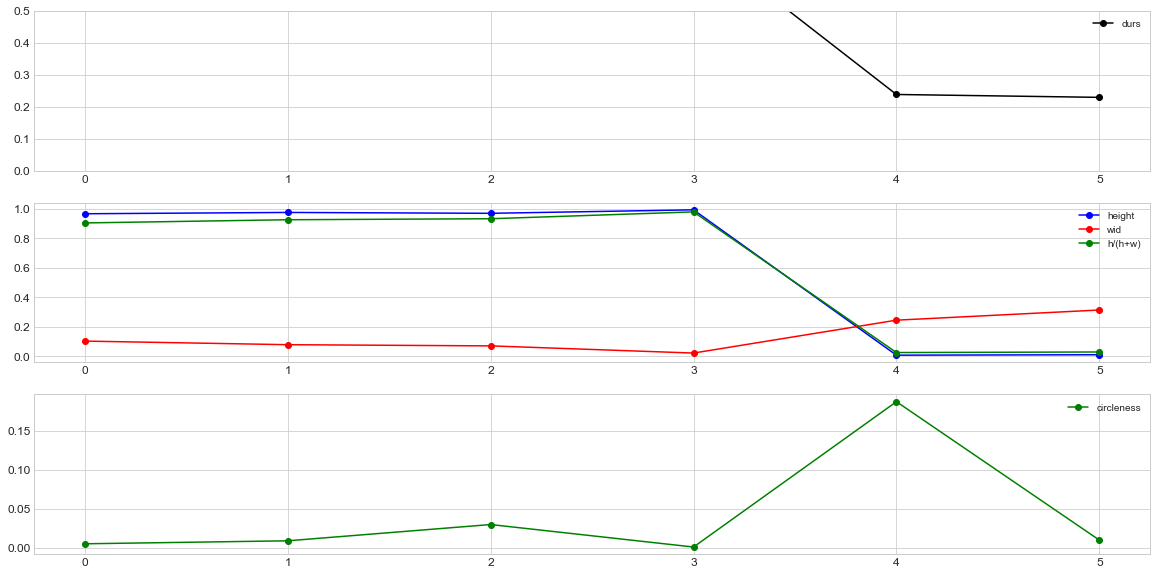

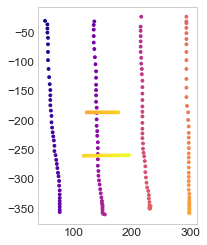

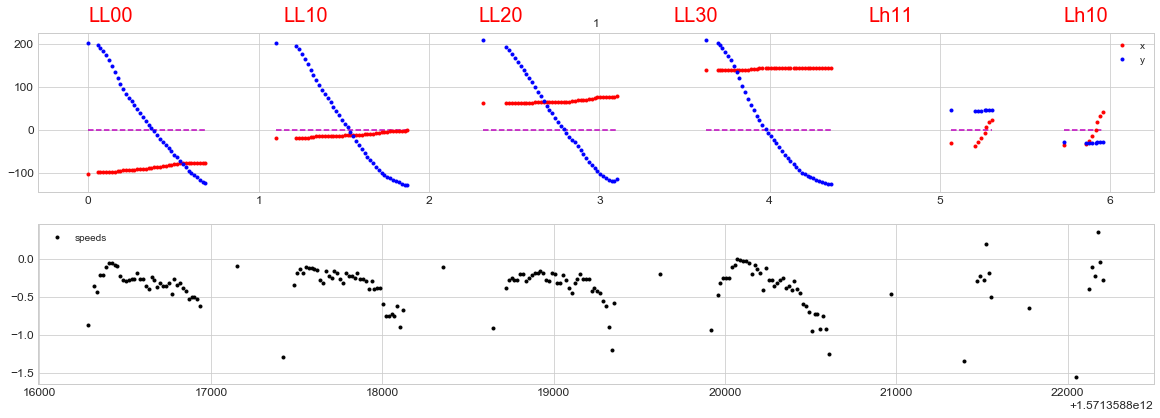

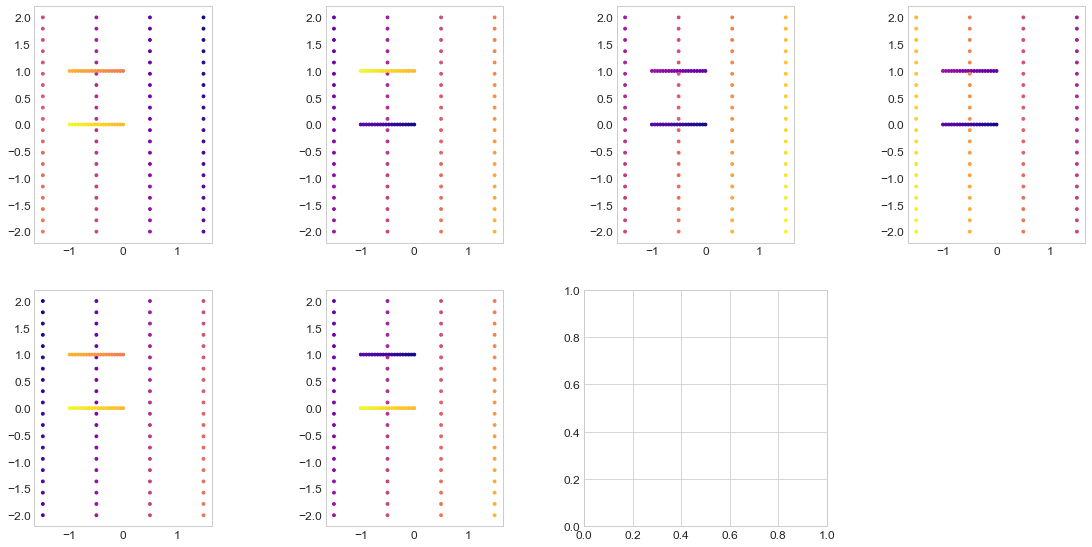

In [58]:
# ==== for a subject plot trajectory and a bunch of parses in order form best to least similar
HUM = 1
dists = [(d["dist"], d["ec"]) for d in distances if d["hum"]==HUM]

sorted(dists, key=lambda x:x[0])

Ntoplot = 7

indstoplot = np.floor(np.linspace(0, len(dists), Ntoplot))
indstoplot = [int(i) for i in indstoplot]

# -- get human parse
dgseg.plotDrawingAndTimecourse(datflat_hu[HUM], plotUniqueCodes=True, dosplits=True)

plt.figure(figsize=(20,20))
for c, i in enumerate(indstoplot):
    ax = plt.subplot(4,4,c+1)

    # --- get dreamcoder parse
    dgseg.plotDrawing(datflat_ec_rand[i], ax=ax, addstrokelines=True)


In [ ]:
# ===== working with testing tasks
for t in result.getTestingTasks():
    print(result.frontiersOverTime[t][-1])

In [16]:
programnames

['shaping_0',
 'shaping_1',
 'shaping_2',
 'shaping_3',
 'shaping_4',
 'shaping_5',
 'shaping_6',
 'shaping_7',
 'shaping_8',
 'S9_nojitter_shaping_0',
 'S9_nojitter_shaping_1',
 'S9_nojitter_shaping_2',
 'S9_nojitter_shaping_3',
 'S9_nojitter_shaping_4',
 'S9_nojitter_shaping_5',
 'S9_nojitter_shaping_6',
 'S9_nojitter_shaping_7',
 'S9_nojitter_shaping_8',
 'S9_nojitter_shaping_9',
 'S9_nojitter_shaping_10',
 'S9_nojitter_shaping_11',
 'S9_nojitter_shaping_12',
 'S9_nojitter_shaping_13',
 'S9_nojitter_shaping_14',
 'S9_nojitter_shaping_15',
 'S9_nojitter_shaping_16',
 'S9_nojitter_shaping_17',
 'S9_nojitter_shaping_18',
 'S9_nojitter_shaping_19',
 'S9_nojitter_shaping_20',
 'S9_nojitter_shaping_21',
 'S9_nojitter_shaping_22',
 'S9_nojitter_shaping_23',
 'S9_nojitter_shaping_24',
 'S9_nojitter_shaping_25',
 'S9_nojitter_shaping_26',
 'S9_nojitter_shaping_27',
 'S9_nojitter_shaping_28',
 'S9_nojitter_shaping_29',
 'S9_nojitter_shaping_30',
 'S9_nojitter_shaping_31',
 'S9_nojitter_shapin

In [89]:
programnames[66]

'S9_nojitter_19'

In [84]:
# ===== LOAD BEHAVIORAL DATA FROM DRAWGOOD

program_test_names


['test0',
 'test1',
 'test2',
 'test3',
 'test4',
 'test5',
 'test6',
 'test7',
 'test8',
 'test9',
 'test10',
 'test11',
 'test12',
 'test13',
 'test14',
 'test15',
 'test16',
 'test17',
 'test18',
 'test19',
 'test20',
 'test21',
 'test22',
 'test23',
 'test24',
 'test25',
 'test26',
 'test27',
 'test28',
 'test29',
 'test30',
 'test31',
 'test32']

In [45]:
# ===== working with testing tasks
for t in result.getTestingTasks():
    print(result.frontiersOverTime[t][-1])

Frontier(entries=[], task=test0)
Frontier(entries=[], task=test1)
Frontier(entries=[], task=test2)
Frontier(entries=[], task=test3)
Frontier(entries=[], task=test4)
Frontier(entries=[], task=test5)
Frontier(entries=[], task=test6)
Frontier(entries=[], task=test7)
Frontier(entries=[], task=test8)
Frontier(entries=[], task=test9)
Frontier(entries=[], task=test10)
Frontier(entries=[], task=test11)
Frontier(entries=[FrontierEntry(program=(reflect (#(lambda (lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) None (connect $0 (reflect $1 angle6)) $2)))) rep3 #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line) (transform (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some 

In [56]:
result.frontiersOverTime[testtasks[12]][-1].bestPosterior

FrontierEntry(program=(reflect (#(lambda (lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) None (connect $0 (reflect $1 angle6)) $2)))) rep3 #(#(lambda (lambda (connect (reflect $0 angle6) (transform circle (transmat None None (Some $1) None None))))) dist2 line) line) angle4), logPrior=-3.8411804173055772, logLikelihood=0.0

In [65]:

import bin.graphs as G
G.getLikelihood("MAP", result, testtasks[12], 5, False)

NameError: name 'arguments' is not defined

In [58]:
from dreamcoder.domains.draw.drawPrimitives import *
from dreamcoder.domains.draw.primitives import _repeat, _line, _makeAffine, _circle,_connect
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks, SupervisedDraw
from dreamcoder.dreamcoder import ecIterator
from dreamcoder.grammar import Grammar
import numpy as np



In [ ]:
# count the number of parses for each program

for i in range(len(tasks)):
    try:
        parses = Parse.ofProgram(Program.parse(str(result.allFrontiers[tasks[i]].bestPosterior.program)))
        print("task {}, num parses: {}".format(i, len(parses)))
    except:
        continue
    
    # === for each parse, flatten
#     for parse in parses:
        

task 0, num parses: 1
task 2, num parses: 1
task 3, num parses: 1
task 5, num parses: 1
task 6, num parses: 1
task 7, num parses: 1
task 8, num parses: 1
task 9, num parses: 1
task 10, num parses: 2
task 11, num parses: 2
task 12, num parses: 2
task 13, num parses: 8
task 14, num parses: 4
task 15, num parses: 4
task 16, num parses: 4
task 18, num parses: 2
task 19, num parses: 2
task 20, num parses: 4
task 22, num parses: 2
task 23, num parses: 2
task 24, num parses: 2
task 25, num parses: 1
task 26, num parses: 1
task 27, num parses: 8
task 28, num parses: 4
task 29, num parses: 8
task 30, num parses: 16
task 32, num parses: 16
task 33, num parses: 16
task 34, num parses: 32
task 36, num parses: 16
task 37, num parses: 768
task 39, num parses: 64
task 40, num parses: 32
task 41, num parses: 64
task 43, num parses: 32
task 44, num parses: 32
task 45, num parses: 64
task 46, num parses: 512
task 56, num parses: 2
task 63, num parses: 8
task 74, num parses: 4


In [154]:
# === do segmentation using beahvilral code
# === how long does it take to get segmentation codes for N parses?
import timeit
start_time = timeit.default_timer()


i=77
parses = Parse.ofProgram(Program.parse(str(result.allFrontiers[tasks[i]].bestPosterior.program))) # get all parses for this program
datflat = parses2datflat(parses) # convert parses to one datflat object
datsegs = DGseg.getSegmentation([datflat[0]], False) # get string codes for each parse


elapsed = timeit.default_timer() - start_time
print(elapsed)




4.0
[-6.123233995736766e-17, 0.5000000000000001, -0.49999999999999983, -1.4999999999999996, 0.9999999999999999, 0.9999999999999999, 2.0, 6.123233995736765e-17, -1.4999999999999996, -0.49999999999999983, 0.5000000000000001, 1.5000000000000004]
4.8633429069996055


In [158]:
[d["codes"] for d in datsegs[0]]

['C', 'LL', 'LL', 'LL', 'L', 'L', 'C', 'L', 'LL', 'LL', 'LL', 'LL']

4.0
[-6.123233995736766e-17, 0.5000000000000001, -0.49999999999999983, -1.4999999999999996, 0.9999999999999999, 0.9999999999999999, 2.0, 6.123233995736765e-17, -1.4999999999999996, -0.49999999999999983, 0.5000000000000001, 1.5000000000000004]
FAILED TO LOAD STIM .png file...
{'circleness': 1.0, 'badstroke': False, 'height': 0.24963335346278095, 'width': 0.2848768510220513, 'h_rel_hplusw': 0.46703196939594593, 'on_xy': array([-6.123234e-17,  6.123234e-17]), 'off_xy': array([-6.123234e-17, -6.123234e-17]), 'centerpos': array([-0.47293055,  0.        ]), 'x_extremes': [-0.9970689785771799, -6.123233995736766e-17], 'y_extremes': [-0.49926670692556196, 0.49926670692556185], 'codes': 'C'}
ASASDASD
<class 'tuple'>
{'circleness': 1.0, 'badstroke': False, 'height': 0.24963335346278095, 'width': 0.2848768510220513, 'h_rel_hplusw': 0.46703196939594593, 'on_xy': array([-6.123234e-17,  6.123234e-17]), 'off_xy': array([-6.123234e-17, -6.123234e-17]), 'centerpos': array([-0.47293055,  0.        ]), '

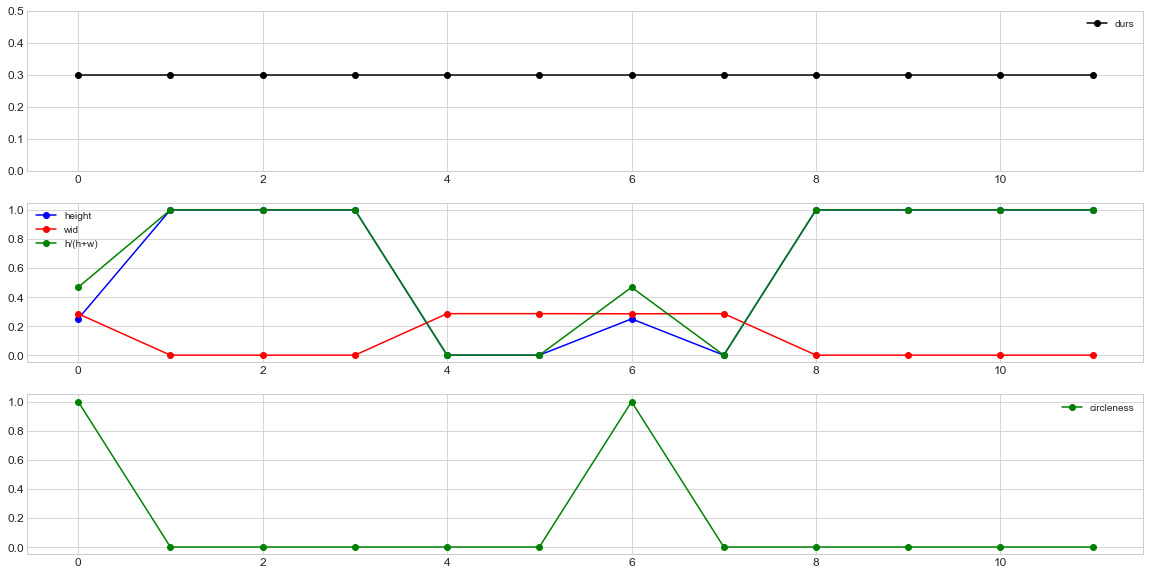

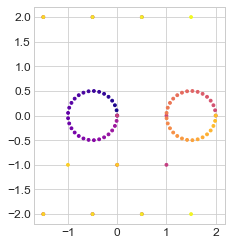

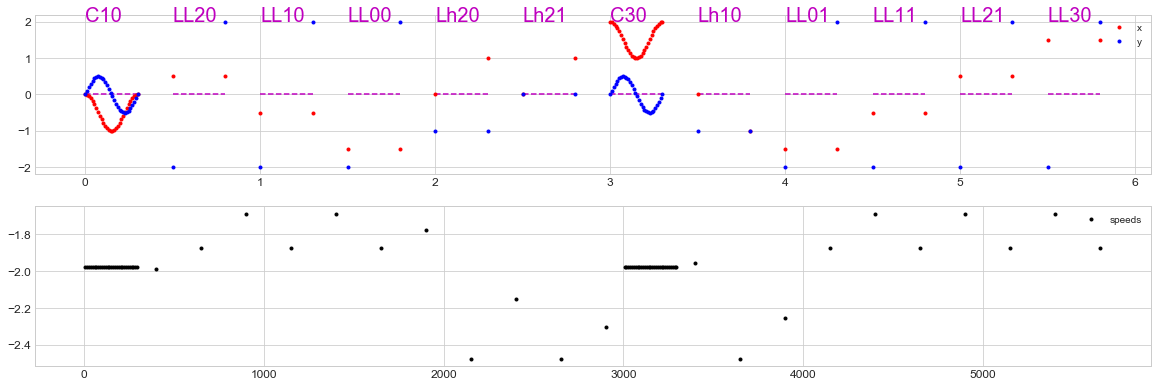

In [199]:
# === plot a single trial
DGseg.plotDrawingAndTimecourse(datflat[0], connectDots=False, plotUniqueCodes=True)

In [10]:
# === for each parse from each program, do 
for i in range(len(tasks)):
    try:
        parses = Parse.ofProgram(Program.parse(str(result.allFrontiers[tasks[i]].bestPosterior.program)))
        print("task {}, num parses: {}".format(i, len(parses)))
    except:
        continue


[array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.88310278e-01,  1.07485220e-01],
       [ 9.53787710e-01,  2.09944551e-01],
       [ 8.98046533e-01,  3.02587108e-01],
       [ 8.23693142e-01,  3.81081028e-01],
       [ 7.34204220e-01,  4.41756022e-01],
       [ 6.33764169e-01,  4.81774996e-01],
       [ 5.27069454e-01,  4.99266707e-01],
       [ 4.19109002e-01,  4.93413261e-01],
       [ 3.14930922e-01,  4.64488360e-01],
       [ 2.19406467e-01,  4.13844499e-01],
       [ 1.37002254e-01,  3.43849729e-01],
       [ 7.15714119e-02,  2.57776929e-01],
       [ 2.61734144e-02,  1.59650765e-01],
       [ 2.93102142e-03,  5.40595092e-02],
       [ 2.93102142e-03, -5.40595092e-02],
       [ 2.61734144e-02, -1.59650765e-01],
       [ 7.15714119e-02, -2.57776929e-01],
       [ 1.37002254e-01, -3.43849729e-01],
       [ 2.19406467e-01, -4.13844499e-01],
       [ 3.14930922e-01, -4.64488360e-01],
       [ 4.19109002e-01, -4.93413261e-01],
       [ 5.27069454e-01, -4.99266707e-01],
       [ 6

In [186]:
# ===== classify all primitives into their column

datseg_single = datsegs[0]

getUniqueCode(datseg_single)

    
# 4) draw a pritmive-only parsed version, with sequnece


# 5) draw a timecourse (on/off), with syls and gaps


[0.]
[2.4492936e-16]
[0. 0.]
[0. 0.]
[0. 0.]
[0.]
[-1.]
[-1.0000000e+00  1.2246468e-16]


['C10',
 'LL20',
 'LL10',
 'LL00',
 'L20',
 'L21',
 'C30',
 'L10',
 'LL01',
 'LL11',
 'LL21',
 'LL30']

In [189]:
datsegs[0][0]

{'circleness': 1.0,
 'badstroke': False,
 'height': 0.24963335346278095,
 'width': 0.2848768510220513,
 'h_rel_hplusw': 0.46703196939594593,
 'on_xy': array([-6.123234e-17,  6.123234e-17]),
 'off_xy': array([-6.123234e-17, -6.123234e-17]),
 'centerpos': array([-0.47293055,  0.        ]),
 'x_extremes': [-0.9970689785771799, -6.123233995736766e-17],
 'y_extremes': [-0.49926670692556196, 0.49926670692556185],
 'codes': 'C',
 'codes_unique': 'C10'}

In [167]:
from operator import itemgetter
print(itemgetter())

<class 'operator.itemgetter'>


In [144]:
a = np.array([1,2,3])
b = np.concatenate((np.array([-100]), a))
print(b)

[-100    1    2    3]


In [49]:
centers[0]

array([0.5, 0. ])

In [8]:
## ====== PROBLEM - THIS SHOULD GIVE 6 PAREES, BUT ISNTEAD ONLY GIVES 3. 
# NOTE: WORKS FINE IF (1) USE (TRANSFORM LINE) INSTEAD OF LINE, OR (2) USE #(CONNECT CIFCLE CIRLCE))

p = Program.parse("(connect line (connect circle circle))")
PP = Parse.ofProgram(p)
print(len(PP))
for p in PP:
    print(p)

Parse.animate_all(PP, "/tmp/parses.png")


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


3
Parse([array([[0., 0.],
       [1., 0.]]), array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
       [ 